In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('dataset.csv')
data.rename(columns={'Star type': 'star_type'}, inplace=True)
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),star_type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
category = 'star_type'
data_train, data_test = train_test_split(data, test_size=0.3, random_state=42, stratify=data[category])
print(data_train.shape, data_test.shape)

(168, 7) (72, 7)


In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
properties = ['Temperature (K)', 'Radius(R/Ro)']
dt_classification = DecisionTreeClassifier(max_depth = 10)
dt_classification.fit(data_train[properties], data_train[category])

DecisionTreeClassifier(max_depth=10)

In [7]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [8]:
predictionsOnTrainset = dt_classification.predict(data_train[properties])
predictionsOnTestset = dt_classification.predict(data_test[properties])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, data_train.star_type)
accuracyTest = calculate_accuracy(predictionsOnTestset, data_test.star_type)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 1.0
Accuracy on test set 0.9583333333333334


In [9]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("Trees/decision_tree_16")

    # Display in the notebook
    return graph 

In [10]:
data.star_type = data.star_type.astype('str')

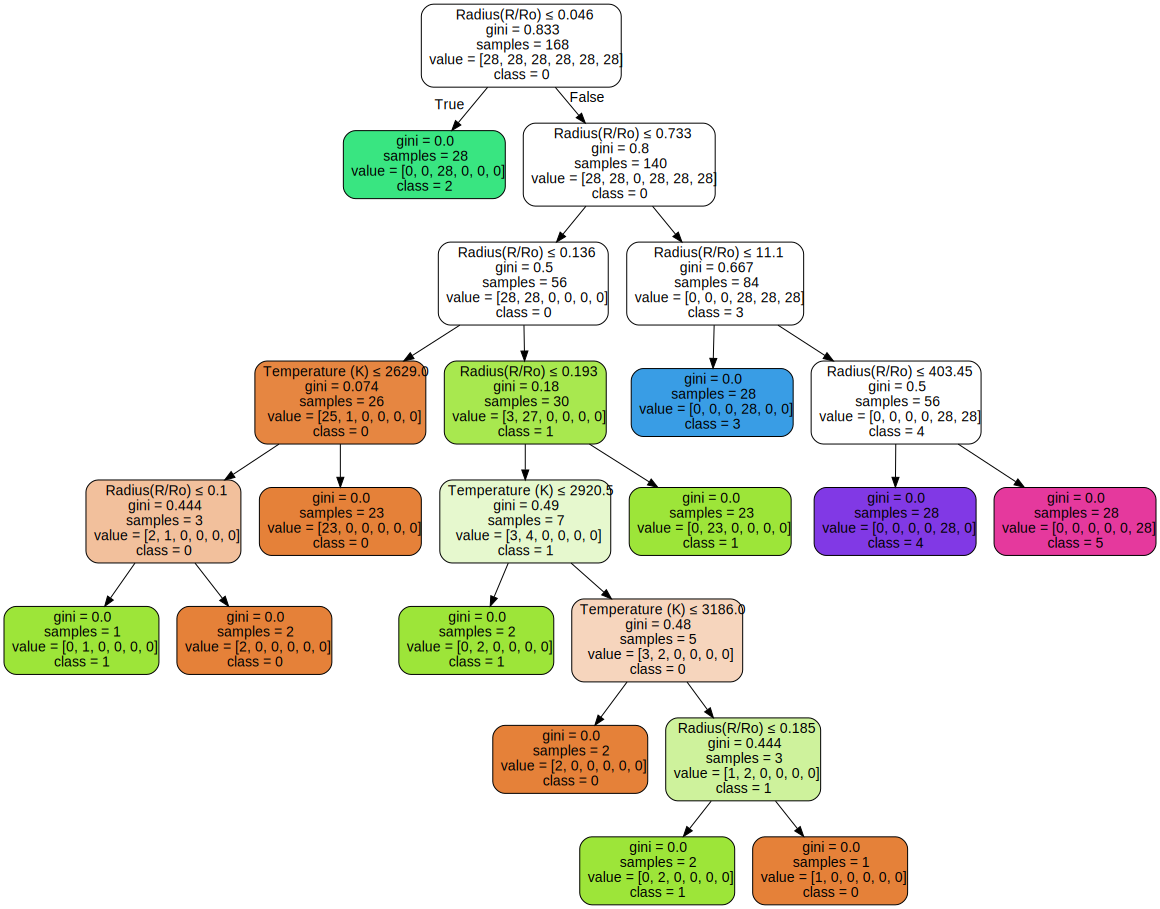

In [11]:
plot_tree_classification(dt_classification, properties, np.sort(data.star_type.unique()))